# Multiple Linear Regression of RNA-Seq data in Aspergillus aculeatus
ref: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

# Part2 Feature Selection

<strong>Objective:</strong><br />
1. ทำการคัดกรองยีน (feature/attribute) ที่ไม่เกี่ยวข้องกับ enzyme activity ออกไป
2. เลือกยีน (feature/attribute) ที่มีความสำคัญหรือเกี่ยวข้องกันกับค่า enzyme activity ที่มากที่สุดจำนวน 5-9 ยีน (จำนวน ยีนที่เลือกควรจะน้อยกว่าจำนวนตัวอย่าง)

บทความที่เกี่ยวข้องกับการทำ Feature Selection แบบอธิบายหลักการและ concept

https://www.facebook.com/dataforeverybody/posts/2363798550546954/

https://medium.com/@key.sompornpettakon.statkmitl/feature-selection-101-9eb8cf362dff

https://medium.com/@doohpim/03-feature-selection-%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%81%E0%B8%84%E0%B8%B8%E0%B8%93%E0%B8%A5%E0%B8%B1%E0%B8%81%E0%B8%A9%E0%B8%93%E0%B8%B0-446f8f0c094b

https://arnondora.in.th/feature-selection-machine-learning/

In [4]:
#เริ่มต้นด้วยการ Load package ที่จำเป็นสำหรับการทำงาน
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
#ตรวจสอบ version ของ package ที่ได้ทำการเรียกมา
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 0.25.3
numpy   version: 1.17.4
seaborn version: 0.9.0


In [6]:
#เริ่มต้นด้วยการโหลดข้อมูลจากขั้นตอนที่แล้วมา 
#(เนื่องจากข้อมูลมีจำนวนมาก บาง column อาจไม่ถูกแสดงน๊า)
url='https://raw.githubusercontent.com/wutto/aspergillusAculeatus/main/1_input_rapidMiner_8623_CMCase.csv'
df=pd.read_csv(url)
df.head(10)

,geneId,acu00000_1,acu00000_13,acu00000_14,acu00000_15,acu00000_2,acu00000_4,acu00000_5,acu00000_9,acu00002_2,...,acu08289_1,acu08290_1,acu08291_1,acu08292_1,acu08293_1,acu08294_1,acu08295_1,activity,activity2Class,activity3Class
0,BCC199_A,8.553751,0.172295,0.753331,16.922520,48.318485,0.344598,6.002934,1.195810,2.951030,...,3.369402,1.049392,1.218003,9.117593,47.871967,4.597338,1.959886,1.516,high,medium
1,BCC199_B,17.619043,0.000000,0.281621,4.535475,15.585501,0.255006,2.996228,0.463476,2.474162,...,0.475442,0.327337,0.000000,0.879822,79.582764,1.578946,0.556271,1.307,high,medium
2,BCC199_C,15.777807,0.000000,0.000000,4.093641,16.862034,0.078562,1.626894,0.569101,3.262403,...,0.842889,0.492263,0.257300,6.860642,83.444359,3.561083,1.164043,1.575,high,medium
3,BCC56535_A,0.889026,0.234836,1.877119,12.957662,22.900455,3.847135,12.824106,0.761631,0.409413,...,3.625029,15.687724,34.086227,30.144608,55.342480,6.240952,0.650502,0.260,low,low
4,BCC56535_B,0.000000,0.000000,0.000000,4.256706,12.697367,0.000000,0.384335,0.246236,0.000000,...,0.074069,0.000000,1.020378,13.492409,65.686302,8.724833,0.138616,0.145,low,low
5,BCC56535_C,0.000000,0.000000,0.000000,7.068939,7.409282,0.213775,1.186643,0.000000,0.077722,...,0.000000,0.000000,1.270019,7.693921,58.360996,5.185790,0.034781,0.195,low,low
6,BCC56535_D,0.057678,0.000000,1.021568,7.296792,8.579680,0.391414,5.521814,0.400340,0.000000,...,0.158293,0.252113,3.693663,8.895016,69.126770,1.527307,0.000000,0.251,low,low
7,HUT2365_A,0.000000,0.220658,10.100449,9.381460,3.981732,2.054885,33.030998,1.245618,1.547278,...,0.645219,12.719957,14.126668,98.608780,38.251125,2.338180,2.915910,5.333,high,high
8,HUT2365_B,0.581114,0.097028,3.222058,3.890594,7.513707,1.732018,33.175011,1.382367,1.077620,...,0.776796,2.879683,9.945427,21.128397,29.774530,2.653734,3.243918,3.624,high,high
9,HUT2365_C,0.598314,0.094493,1.786440,2.082320,7.243462,1.473324,29.517067,1.538031,1.867690,...,0.619233,2.761027,9.927620,19.668028,29.649534,2.786057,3.379966,4.050,high,high


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 8627 entries, geneId to activity3Class
dtypes: float64(8623), int64(1), object(3)
memory usage: 674.1+ KB


## ทำการโหลด package sklearn: Classifier

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [9]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.22.1


In [10]:
df.columns

Index(['geneId', 'acu00000_1', 'acu00000_13', 'acu00000_14', 'acu00000_15',
       'acu00000_2', 'acu00000_4', 'acu00000_5', 'acu00000_9', 'acu00002_2',
       ...
       'acu08289_1', 'acu08290_1', 'acu08291_1', 'acu08292_1', 'acu08293_1',
       'acu08294_1', 'acu08295_1', 'activity', 'activity2Class',
       'activity3Class'],
      dtype='object', length=8627)

1. วิธีที่ 1 คัดเลือก important features จาก Random forest (labelled class เป็น nominal class หรือ คลาสที่เป็นคำนาม ซึ่งในที่นี้คือ Enzyme activity ที่แบ่งเป็น สูง กลาง ต่ำ)

1.1 คัดเลือก important features จาก Random forest โดยแบ่งคลาส enzyme activity เป็น สูง กลาง ต่ำ 

In [11]:
# เริ่มต้นจากการกำหนด Input และ class label ก่อน โดย
# input จะเป็น ค่า TPM 
# class label เป็นค่า Enzyme activity (สูง, กลาง, ต่ำ ตาม strain HUT2365, BCC199, BCC56535)

# model= DecisionTreeClassifier(random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)
#X=df[['acu00000_1', 'acu00000_13', 'acu00000_14',
#       'acu00000_15', 'acu00000_2', 'acu00000_4', 'acu00000_5', 'acu00000_9']]

model= RandomForestClassifier(n_estimators=250, random_state=9)
X=df.iloc[0:10,1:8624]
y=df['activity3Class']
model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [12]:
# แสดงค่า feature ที่มีความสำคัญจากน้อยไปมาก

model.feature_importances_
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

acu00000_1    0.000000
acu05308_1    0.000000
acu05307_1    0.000000
acu05306_1    0.000000
acu05304_1    0.000000
                ...   
acu03738_1    0.004715
acu03415_1    0.004903
acu05812_1    0.005071
acu00557_1    0.005793
acu06530_1    0.006182
Length: 8623, dtype: float64

In [13]:
#คัดกรองเฉพาะ Feature ที่มีค่ามากกว่า 0.001
selectedFeature = fs[fs > 0.001]
print(selectedFeature)

acu04284_1    0.001103
acu01192_1    0.001103
acu04835_1    0.001103
acu03983_1    0.001103
acu05623_1    0.001103
                ...   
acu03738_1    0.004715
acu03415_1    0.004903
acu05812_1    0.005071
acu00557_1    0.005793
acu06530_1    0.006182
Length: 480, dtype: float64


In [14]:
#Save Feature ที่ผ่านการคัดกรอง
selectedFeature.to_csv('C:\\Users\\wutto\\Desktop\\ML_aspergillus_aculeatus\\selectedFeature3Classes.csv', index=True)

C:\Users\wutto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


1.2 คัดเลือก important features จาก Random forest โดยแบ่งคลาส enzyme activity เป็น สูง และ ต่ำ 

In [15]:
# เริ่มต้นจากการกำหนด Input และ class label เหมือนในขั้นตอนก่อนหน้า โดย
# input จะเป็น ค่า TPM 
# แต่ class label เป็นค่า Enzyme activity (สูง และ ต่ำ ตาม strain HUT2365, BCC199+BCC56535)

# model= DecisionTreeClassifier(random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)
#X=df[['acu00000_1', 'acu00000_13', 'acu00000_14',
#       'acu00000_15', 'acu00000_2', 'acu00000_4', 'acu00000_5', 'acu00000_9']]

model= RandomForestClassifier(n_estimators=250, random_state=9)
X=df.iloc[0:10,1:8624]
y=df['activity2Class']
model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [16]:
# แสดงค่า feature ที่มีความสำคัญจากน้อยไปมาก

model.feature_importances_
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

acu00000_1    0.000000
acu05352_1    0.000000
acu05351_1    0.000000
acu05350_1    0.000000
acu05348_1    0.000000
                ...   
acu06530_1    0.008032
acu05056_1    0.008032
acu03726_1    0.008032
acu01004_1    0.008032
acu05812_1    0.008032
Length: 8623, dtype: float64

In [17]:
#คัดกรองเฉพาะ Feature ที่มีค่ามากกว่า 0.001
selectedFeature = fs[fs > 0.001]
print(selectedFeature)

acu01619_1    0.004016
acu00747_1    0.004016
acu03708_1    0.004016
acu01618_1    0.004016
acu06969_1    0.004016
                ...   
acu06530_1    0.008032
acu05056_1    0.008032
acu03726_1    0.008032
acu01004_1    0.008032
acu05812_1    0.008032
Length: 244, dtype: float64


In [18]:
#Save Feature ที่ผ่านการคัดกรอง
selectedFeature.to_csv('C:\\Users\\wutto\\Desktop\\ML_aspergillus_aculeatus\\selectedFeature2Classes.csv', index=True)

C:\Users\wutto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


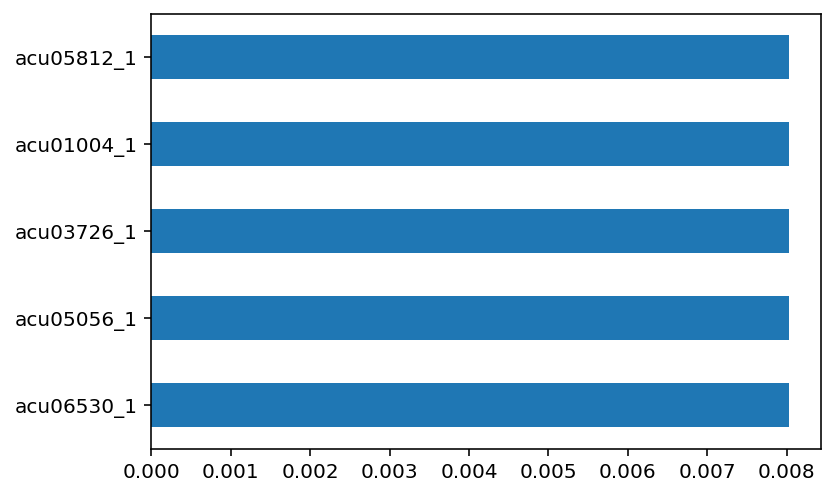

In [19]:
#ทดลอง plot graph แสดง feature ที่มี score มากกว่า 0.005 
fs[fs > 0.005].plot(kind='barh')

In [23]:
fs.nlargest(5) #.index

acu06530_1    0.008032
acu05056_1    0.008032
acu03726_1    0.008032
acu01004_1    0.008032
acu05812_1    0.008032
dtype: float64

In [25]:
## เลือกวิเคราะห์ต่อกับข้อมูลที่แบ่งคลาสเป็นสองคลาสเท่านั้น (Enzyme Activity = สูง และ ต่ำ)
## จากขั้นตอนก่อนหน้า จะได้ important feature จำนวน 5 ยีน
## ขั้นตอนต่อมาเราจะใช้ feature (gene) ทั้ง 5 ตัวดังกล่าว ในการสร้าง model 
## และวัดประสิทธิภาพของ model โดยใช้วิธี split test + confusion matrix

fs[fs > 0.005].index
X=df[fs[fs > 0.005].index]
y=df['activity2Class']
X.head()

,acu06530_1,acu05056_1,acu03726_1,acu01004_1,acu05812_1
0,0.137958,4.596985,9.502972,10.966106,263.217682
1,0.210226,2.622192,12.571158,4.154117,157.403931
2,0.348005,1.524597,20.901283,4.891729,183.043579
3,0.642355,0.572091,5.349617,26.824442,87.745689
4,0.000000,0.136923,4.398042,13.408345,25.802320


In [35]:
# use stratify to split train/test
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

## scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>

In [36]:
## ขั้นตอนนี้จะลองค้นหา important features โดยอาศัย Algorithm อื่น
## แล้วทำการคัดเลือก important features จาก split test + confusion matrix
algo=[
    [KNeighborsClassifier(n_neighbors=3), 'KNeighborsClassifier'], 
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'], 
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=3), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'], 
    [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')    

KNeighborsClassifier score: 1.0000
[[2 0]
 [0 1]]
              precision    recall  f1-score   support

        high       1.00      1.00      1.00         2
         low       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 1.0000
[[2 0]
 [0 1]]
              precision    recall  f1-score   support

        high       1.00      1.00      1.00         2
         low       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

----------------------------------------------------------------------------------------------------
Perceptron           score: 1.0000
[[2 0]
 [